   # Covid-19-Project 2020
<img src="./picture/grippeviren.jpg" Width="800"/>



### What we are doing here:
### 1) We will scrap the data via crawler and Beautifulsoup to get online data about covid19
### 2) We'll focus on the dependent variables i.e. ('Active' ,'Deaths','Active') and try to know a little bit more about it.
### 3) Basic exploratory data analysis by visualization
### 4) Predict the spread of the Virus in the future
### 5) Conclusions

In [128]:
#Importings
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt


# Covid-19-Project 2020

##### Max Boyar - 320407190
##### Vladimir Sergienko - 317303071

#### pull first data -covid19 spread per day Worldwide

In [82]:
df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [83]:
df_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
0,NaN,Afghanistan,33.00000,65.000000,0,0,0,0,0,0,...,120,170,174,237,273,281,299,349,367,423
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,212,223,243,259,277,304,333,361,377,383
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,511,584,716,847,986,1171,1251,1320,1423,1468
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,334,370,376,390,428,439,466,501,525,545
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,7,7,7,8,8,8,10,14,16,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Falkland Islands (Malvinas),United Kingdom,-51.79630,-59.523600,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,2,2
259,Saint Pierre and Miquelon,France,46.88520,-56.315900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
260,NaN,South Sudan,6.87700,31.307000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,2
261,NaN,Western Sahara,24.21550,-12.885800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,4,4


# 1.Scrapping Data 
<img src="./picture/scraper-bot-app-icon-malicious-robot-content-stealing-software-web-vector-id1206210208-1.jpg" Width="800"/>


In [84]:
#Names of regions for the classification of countries
regions=['Africa','Europe','Latin caribbean','Northern america','Oceania'] 

#---------------------------------------------------------------------------------------------------------------------------#

#Here is a list of website addresses that will take the information from them for the purpose of the project
url_world_data='https://www.worldometers.info/coronavirus/'
url_world_pop_reg='https://www.worldometers.info/population/countries-in-asia-by-population/'
url_world_pop_reg_list=['https://www.worldometers.info/population/countries-in-africa-by-population/'
          ,'https://www.worldometers.info/population/countries-in-europe-by-population/'
          ,'https://www.worldometers.info/population/countries-in-latin-america-and-the-caribbean-by-population/'
          ,'https://www.worldometers.info/population/countries-in-northern-america-by-population/'
          ,'https://www.worldometers.info/population/countries-in-oceania-by-population/']

In [85]:
#Defines a function that receives a website address and extracts the required information from it
#The main purpose of the function is to extract information from a site
#---------------------------------------------------------------------------------------------------------------------------#
#The function is divided into two cases:
# 1) Taking information on countries dealing with Corona cases
# 2) Obtaining information on the amount of citizens in the state and the region of the country
#---------------------------------------------------------------------------------------------------------------------------#
#The function accepts 3 parameters:
#1) URL
#2) State area
#3) Case identifier for use of the function
#---------------------------------------------------------------------------------------------------------------------------#
def Df_by_rigion(url,reg,flag):
    
    response = requests.get(url)
    soup = BeautifulSoup(response.text,"html.parser")
    #Create list of Columns
    cols_raw=soup.find('thead') #find Thead module
    cols=cols_raw.find_all("th") #find all th in the Thead
    columns_list=[] #New list
    
#Obtaining information on the amount of citizens in the state and the region of the country
    if(flag==0):
        text=soup.find(id="example2").get_text()
        for x in cols: 
            if (x.get_text()=='Country (or dependency)' or x.get_text()=='Population (2020)' ):
                columns_list.append(x.get_text()) #append all th into list
            
        # scrap All table
        list_of_lists=[] # list of lists for each row
        table_raw=soup.find('tbody')
        table=table_raw.find_all('tr')
  
        for row in table:
            counter=0
            uni_row_list=[] #1 row list
            uni_row=row.find_all('td')
            for i in uni_row:
                if(counter==1 or counter==2):
                    uni_row_list.append(i.get_text())
                counter+=1
            list_of_lists.append(uni_row_list)
        
        corona_df_func = pd.DataFrame.from_records(list_of_lists, columns=columns_list)
        corona_df_func['Region']=reg
    #Taking information on countries dealing with Corona cases
    else:
        text=soup.find(id="main_table_countries_today").get_text()
        for x in cols: #append all th into list
            columns_list.append(x.get_text())

        # scrap All table
        list_of_lists=[] # list of lists for each row
        table_raw=soup.find('tbody')
        table=table_raw.find_all('tr')
        
        for row in table:
            uni_row_list=[] #1 row list
            uni_row=row.find_all('td')
            for i in uni_row:
                uni_row_list.append(i.get_text())
            list_of_lists.append(uni_row_list)
        
        corona_df_func = pd.DataFrame.from_records(list_of_lists, columns=columns_list)
        corona_df_func['Population']='0'
        corona_df_func['Region']='0'
    return corona_df_func

In [86]:
Reg_pop_df0=Df_by_rigion(url_world_pop_reg,'Asia',0)
counter=0
for val in url_world_pop_reg_list:
    Reg_pop_df=Reg_pop_df0.append(Df_by_rigion(val,regions[counter],0))
    Reg_pop_df0=Reg_pop_df
    counter+=1

In [87]:
#Testing, see with There is a connection with the site

In [88]:
corona_df=Df_by_rigion(url_world_data,0,1)

In [89]:
corona_df.drop([0], axis = 0, inplace = True)
corona_df.drop(corona_df.columns[[2,4,8, 9,10,11]], axis = 1, inplace = True)


In [90]:
corona_df=corona_df.reset_index(drop=True)

### Second dataframe(after scrapping)-covid 19 total cases Worldwide

In [91]:
corona_df.head()

,"Country,Other",TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Population,Region
0,USA,"400,549","12,857","21,711","365,981","9,169",0,0
1,Spain,"146,690","14,555","48,021","84,114","7,069",0,0
2,Italy,"135,586","17,127","24,392","94,067","3,792",0,0
3,France,"109,069","10,328","19,337","79,404","7,131",0,0
4,Germany,"107,663","2,016","36,081","69,566","4,895",0,0


Reformating Regions and Population:

In [92]:
for j in range (len(Reg_pop_df)):    
    if(Reg_pop_df['Country (or dependency)'].iloc[j]=='United States'):
            Reg_pop_df['Country (or dependency)'].iloc[j]='USA'
    if(Reg_pop_df['Country (or dependency)'].iloc[j]=='St. Vincent & Grenadines'):
            Reg_pop_df['Country (or dependency)'].iloc[j]='St.VincentGrenadines'
    if(Reg_pop_df['Country (or dependency)'].iloc[j]=='United Kingdom'):
            Reg_pop_df['Country (or dependency)'].iloc[j]='UK'
    if(Reg_pop_df['Country (or dependency)'].iloc[j]=='South Korea'):
            Reg_pop_df['Country (or dependency)'].iloc[j]='S. Korea'
    if(Reg_pop_df['Country (or dependency)'].iloc[j]=='Czech Republic (Czechia)'):
            Reg_pop_df['Country (or dependency)'].iloc[j]='Czechia'
    if(Reg_pop_df['Country (or dependency)'].iloc[j]=='United Arab Emirates'):
            Reg_pop_df['Country (or dependency)'].iloc[j]='UAE'
    if(Reg_pop_df['Country (or dependency)'].iloc[j]=='State of Palestine'):
            Reg_pop_df['Country (or dependency)'].iloc[j]='Palestine'   
    if(Reg_pop_df['Country (or dependency)'].iloc[j]=='DR Congo'):
            Reg_pop_df['Country (or dependency)'].iloc[j]='DRC'
    if(Reg_pop_df['Country (or dependency)'].iloc[j]=='Saint Kitts & Nevis'):
            Reg_pop_df['Country (or dependency)'].iloc[j]='SaintKittsandNevis' 
    if(Reg_pop_df['Country (or dependency)'].iloc[j]=='Holy See'):
            Reg_pop_df['Country (or dependency)'].iloc[j]='VaticanCity' 
    if(Reg_pop_df['Country (or dependency)'].iloc[j]=='Central African Republic'):
            Reg_pop_df['Country (or dependency)'].iloc[j]='CAR'
    if(Reg_pop_df['Country (or dependency)'].iloc[j]=='St. Vincent & Grenadines'):
            Reg_pop_df['Country (or dependency)'].iloc[j]='St.VincentGrenadines' 
#Reg_pop_df['Country (or dependency)'].iloc[67]='IvoryCoast'
#corona_df['Country,Other'].iloc[15]='South Korea'
for i in range (len(corona_df)):
    for j in range (len(Reg_pop_df)):  
        if(corona_df['Country,Other'].iloc[i]==Reg_pop_df['Country (or dependency)'].iloc[j]):
            corona_df['Population'].iloc[i]=Reg_pop_df['Population (2020)'].iloc[j]
            corona_df['Region'].iloc[i]=Reg_pop_df['Region'].iloc[j]
            


In [93]:
corona_df

,"Country,Other",TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Population,Region
0,USA,"400,549","12,857","21,711","365,981","9,169","331,002,651",Northern america
1,Spain,"146,690","14,555","48,021","84,114","7,069","46,754,778",Europe
2,Italy,"135,586","17,127","24,392","94,067","3,792","60,461,826",Europe
3,France,"109,069","10,328","19,337","79,404","7,131","65,273,511",Europe
4,Germany,"107,663","2,016","36,081","69,566","4,895","83,783,942",Europe
...,...,...,...,...,...,...,...,...
206,Papua New Guinea,2,,,2,,"8,947,024",Oceania
207,South Sudan,2,,,2,,"11,193,725",Africa
208,Saint Pierre Miquelon,1,,,1,,0,0
209,Timor-Leste,1,,,1,,"1,318,445",Asia


# 2.Cleaning and Reformating
<img src="./picture/pexels-photo-434163.jpeg" Width="800"/>


### Describing data types

In [94]:
#Data info
print (corona_df.info())
#Here we need to change all str's to int's 
#But first we need to do data cleaning 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 8 columns):
Country,Other       211 non-null object
TotalCases          211 non-null object
TotalDeaths         211 non-null object
TotalRecovered      211 non-null object
ActiveCases         211 non-null object
Serious,Critical    211 non-null object
Population          211 non-null object
Region              211 non-null object
dtypes: object(8)
memory usage: 13.3+ KB
None


### Cleaning data 

In [95]:
#Here we clear all unnecessary data
length=len(corona_df)
for col in corona_df:
    temp_name_col=col
    corona_df[temp_name_col]=corona_df[temp_name_col].str.replace('+','')
    corona_df[temp_name_col]=corona_df[temp_name_col].str.replace(',','')
    corona_df[temp_name_col]=corona_df[temp_name_col].str.replace('\n','')
    corona_df[temp_name_col]=corona_df[temp_name_col].str.replace(' ','')
    for i in range(length):
        if(corona_df[temp_name_col][i]==''):
            corona_df[temp_name_col][i]='0'

In [96]:
corona_df.head()

,"Country,Other",TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Population,Region
0,USA,400549,12857,21711,365981,9169,331002651,Northernamerica
1,Spain,146690,14555,48021,84114,7069,46754778,Europe
2,Italy,135586,17127,24392,94067,3792,60461826,Europe
3,France,109069,10328,19337,79404,7131,65273511,Europe
4,Germany,107663,2016,36081,69566,4895,83783942,Europe


### Reformating data

In [97]:
#Convert data in columns to useful integers, for further work
for col in corona_df:
    if(col!='Reported1st case' and col!='Country,Other' and col!='Region' ):
            corona_df[col]=corona_df[col].astype(str).astype(int)

#### datatypes after reformating

In [98]:
#Check data info
print (corona_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 8 columns):
Country,Other       211 non-null object
TotalCases          211 non-null int32
TotalDeaths         211 non-null int32
TotalRecovered      211 non-null int32
ActiveCases         211 non-null int32
Serious,Critical    211 non-null int32
Population          211 non-null int32
Region              211 non-null object
dtypes: int32(6), object(2)
memory usage: 8.4+ KB
None


In [99]:
corona_df.describe()

,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Population
count,211.00000,211.000000,211.000000,211.000000,211.000000,2.110000e+02
mean,6863.14218,395.336493,1465.322275,5002.483412,227.473934,3.644037e+07
std,33247.59898,1983.785301,7400.941649,27788.280780,1064.446967,1.422491e+08
min,1.00000,0.000000,0.000000,1.000000,0.000000,0.000000e+00
25%,20.00000,0.500000,2.000000,17.500000,0.000000,6.387005e+05
50%,248.00000,5.000000,30.000000,165.000000,2.000000,6.624554e+06
75%,1527.00000,37.000000,133.000000,1153.500000,27.000000,2.401171e+07
max,400549.00000,17127.000000,77279.000000,365981.000000,9169.000000,1.439324e+09


# Visualiztion
<img src="./picture/11-Killer-Open-Data-Sources-and-Free-Visualization-Tools-1024x768.jpg" Width="800"/>


### Total Covid-19 spread worldwide

In [100]:
world=corona_df.groupby("Country,Other")["TotalCases","ActiveCases","TotalDeaths"].sum().reset_index()

figure = px.choropleth(world, locations="Country,Other",
                      locationmode='country names',color="ActiveCases",
                      hover_name='Country,Other',range_color=[1,10000],
                      color_continuous_scale="orrd",
                      title='Countries with Active Cases') 
figure.show()

Active Cases observations :

1) Most of the countries have crossed the 10000 Acive cases per country, while some of them can control the spread of the virus and have kept it under 1000.

2) China is one of the only nations which has been decreasing the active number of cases

3) But in some other nations like the US, Italy, Spain, France,and most important ISRAEL, the number of active cases is rising rapidly

### Total Death spread worldwide

In [101]:
world['size'] = world['TotalDeaths'].pow(0.2)
fig = px.scatter_geo(world, locations="Country,Other",locationmode='country names', color="TotalDeaths",
                     hover_name="Country,Other", size="size",
                     projection="natural earth",title='Death count of each country')
fig.show()

###  Top active cases worldwide

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total cases')]

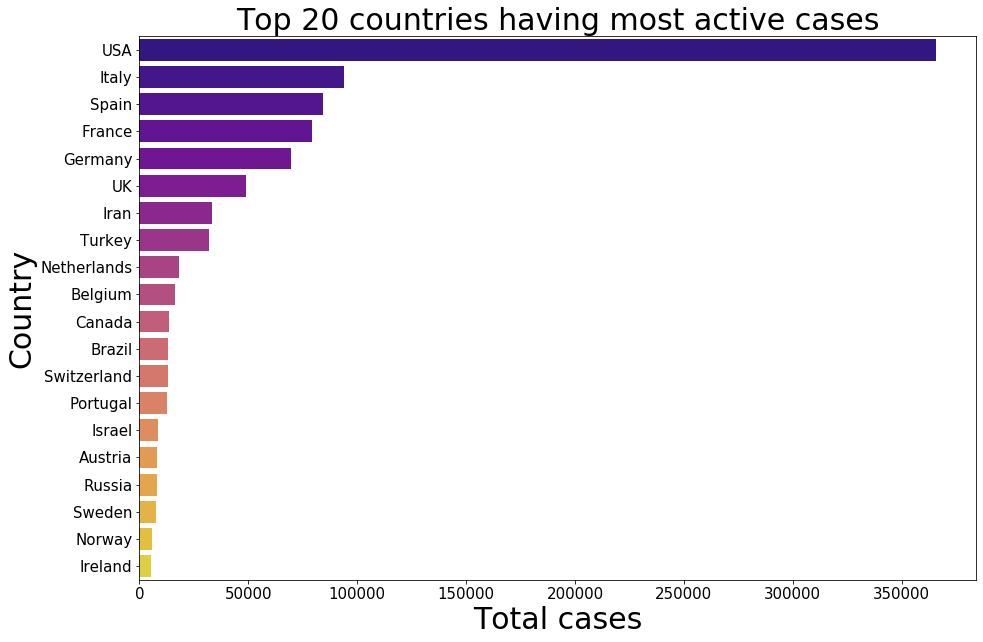

In [102]:

active_df = world.groupby(by = 'Country,Other')['ActiveCases'].sum().sort_values(ascending = False).head(20).reset_index()
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 30)
plt.ylabel('Country',fontsize = 30)
plt.title("Top 20 countries having most active cases" , fontsize = 30)
ax = sns.barplot(x = active_df.ActiveCases, y = active_df['Country,Other'],palette = 'plasma') # real data
ax.set(xlabel='Total cases', ylabel='Country') #New name to xy labels

1)We can see that USA,Italy,Spain,Germany are in top of the world

2)As the covid-19 testing is increasing, The active number of cases is also increasing day by day

3)In comparison with the total population, Italy, Spain, Germany and France are the worst-hit nation

4) (While me made this project) israel jumped to the top of the 20 Countries in the world

### Top Deaths worldwide 

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total cases')]

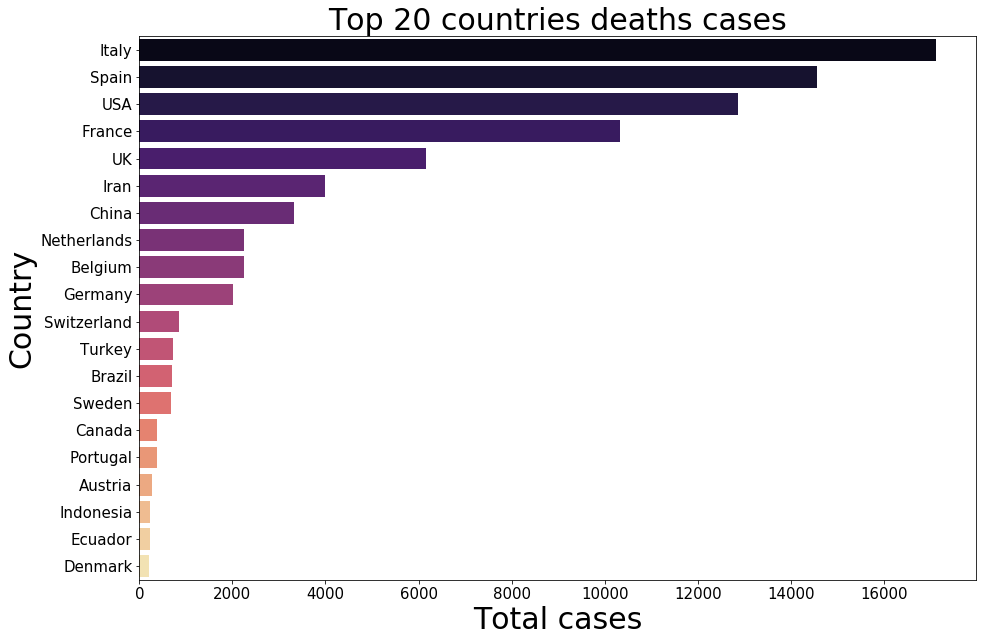

In [103]:
deaths_df = world.groupby(by = 'Country,Other')['TotalDeaths'].sum().sort_values(ascending = False).head(20).reset_index()
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total Deaths cases",fontsize = 30)
plt.ylabel('Country',fontsize = 30)
plt.title("Top 20 countries deaths cases" , fontsize = 30)
ax = sns.barplot(x = deaths_df.TotalDeaths, y = deaths_df['Country,Other'],palette = 'magma') # real data
ax.set(xlabel='Total cases', ylabel='Country') #New name to xy labels

We can see that obviously Italy,Spain and USA are having most Deaths in the top of the world death cases

### Top recovered cases

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total cases')]

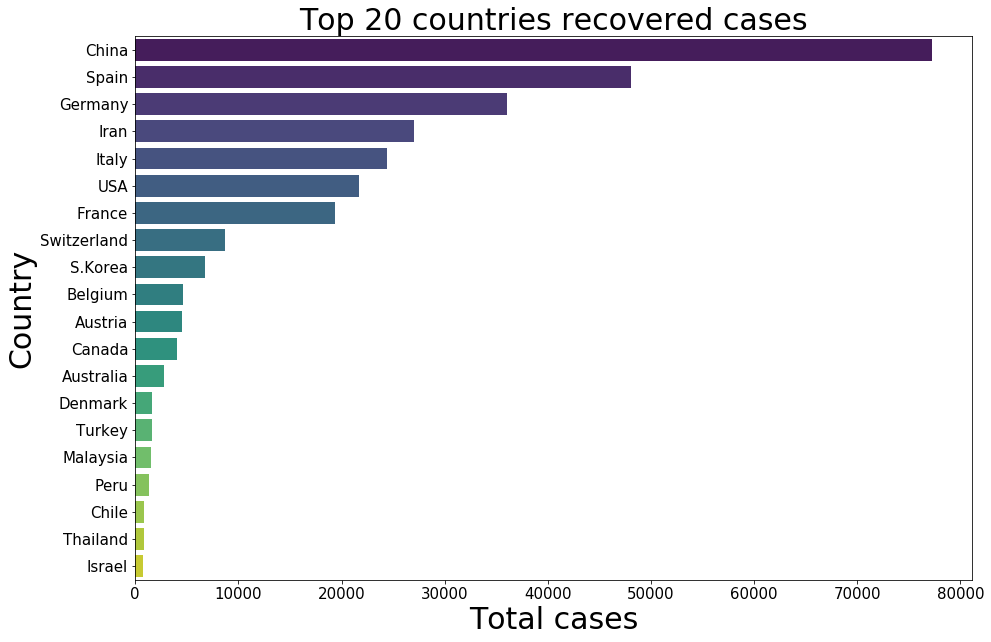

In [104]:
#Total recovered
recovered_df = corona_df.groupby(by = 'Country,Other')['TotalRecovered'].sum().sort_values(ascending = False).head(20).reset_index()

plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Recovered numbers",fontsize = 30)
plt.ylabel('Country',fontsize = 30)
plt.title("Top 20 countries recovered cases" , fontsize = 30)
ax = sns.barplot(x = recovered_df.TotalRecovered, y = recovered_df['Country,Other'],palette = 'viridis') # real data
ax.set(xlabel='Total cases', ylabel='Country') #New name to xy labels

1) By far China is leading in the number of recoveries 

2) Italy, Iran, and Spain are also doing a good job.


### Top 20 countries having the worst mortality and best recovery 

In [105]:
ratio_df = corona_df.groupby(by = 'Country,Other')['TotalCases','TotalRecovered','TotalDeaths'].sum().reset_index()
ratio_df['RecoveryPercentage'] =  round(((ratio_df['TotalRecovered']) / (ratio_df['TotalCases'])) * 100 , 2)
ratio_df['death percentage'] =  round(((ratio_df['TotalDeaths']) / (ratio_df['TotalCases'])) * 100 , 2)
ratio_df.head()


,"Country,Other",TotalCases,TotalRecovered,TotalDeaths,RecoveryPercentage,death percentage
0,Afghanistan,423,18,14,4.26,3.31
1,Albania,400,154,22,38.50,5.50
2,Algeria,1468,113,193,7.70,13.15
3,Andorra,545,39,22,7.16,4.04
4,Angola,17,2,2,11.76,11.76


In [106]:
ratio_top=ratio_df.groupby(by = 'Country,Other')['TotalCases','death percentage'].sum().sort_values('TotalCases',ascending = False).head(20).reset_index()
ratio_top=ratio_top.sort_values('death percentage',ascending = False)
print(ratio_top)

   Country,Other  TotalCases  death percentage
2          Italy      135586             12.63
7             UK       55242             11.15
11   Netherlands       20549             10.94
1          Spain      146690              9.92
9        Belgium       23403              9.57
3         France      109069              9.47
19        Sweden        8419              8.16
6           Iran       64586              6.18
13        Brazil       14152              4.94
5          China       81802              4.07
10   Switzerland       22789              3.76
0            USA      400549              3.21
14      Portugal       13141              2.89
8         Turkey       34109              2.13
12        Canada       17897              2.13
15       Austria       12852              2.12
16       S.Korea       10384              1.93
4        Germany      107663              1.87
17        Israel        9404              0.77
18        Russia        8672              0.73


[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Mortality Rate in percentage')]

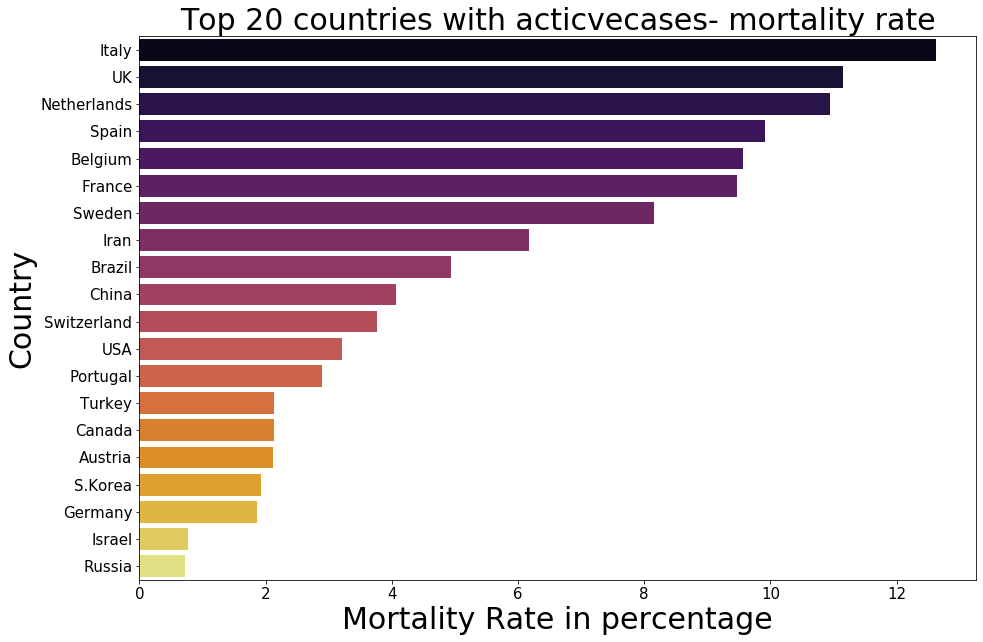

In [107]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 30)
plt.ylabel('Country',fontsize = 30)
plt.title("Top 20 countries with acticvecases- mortality rate" , fontsize = 30)
ax = sns.barplot(x = ratio_top['death percentage'], y = ratio_top['Country,Other'],palette = 'inferno')
ax.set(xlabel='Mortality Rate in percentage', ylabel='Country')

Italy is at the top and this percentage rate is very scary. It seems that they have lost control over the spread of covid-19 and cannot contain it.

In [108]:
ratio_top_r=ratio_df.groupby(by = 'Country,Other')['TotalCases','RecoveryPercentage'].sum().sort_values('TotalCases',ascending = False).head(20).reset_index()
ratio_top_r=ratio_top_r.sort_values('RecoveryPercentage',ascending = False)
print(ratio_top_r)

   Country,Other  TotalCases  RecoveryPercentage
5          China       81802               94.47
16       S.Korea       10384               65.25
6           Iran       64586               41.87
10   Switzerland       22789               38.19
15       Austria       12852               35.11
4        Germany      107663               33.51
1          Spain      146690               32.74
12        Canada       17897               22.51
9        Belgium       23403               20.00
2          Italy      135586               17.99
3         France      109069               17.73
17        Israel        9404                8.52
18        Russia        8672                6.69
0            USA      400549                5.42
8         Turkey       34109                4.64
19        Sweden        8419                2.43
14      Portugal       13141                1.49
11   Netherlands       20549                1.22
13        Brazil       14152                0.90
7             UK    

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Recovery Rate in percentage')]

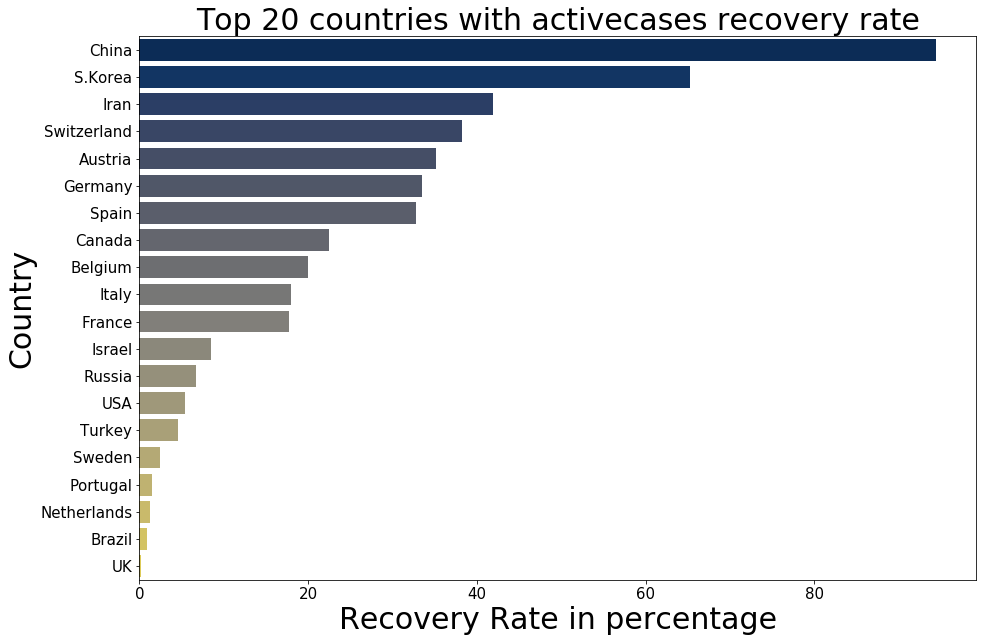

In [109]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 30)
plt.ylabel('Country',fontsize = 30)
plt.title("Top 20 countries with activecases recovery rate" , fontsize = 30)
ax = sns.barplot(x = ratio_top_r['RecoveryPercentage'], y = ratio_top_r['Country,Other'],palette = 'cividis')
ax.set(xlabel='Recovery Rate in percentage', ylabel='Country')

China and South Korea tops the chart and they are doing a remarkable job with a recovery rate of 90%. It tells us that in every 100 infected people, 90 people have recovered from the covid-19 virus.





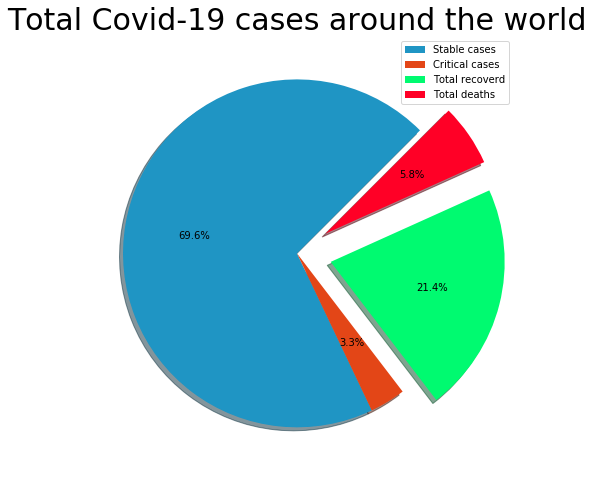

In [110]:
labels = ['Stable cases', 'Critical cases', 'Total recoverd', 'Total deaths']
sizes = [(corona_df['ActiveCases'].sum()-corona_df['Serious,Critical'].sum()),corona_df['Serious,Critical'].sum(),corona_df['TotalRecovered'].sum(),corona_df['TotalDeaths'].sum()]
colors = ['#1f95c4','#e34617', '#00fa70','#ff0026']
explode = (0,0,0.2,0.2)
plt.figure(figsize=(8,8))
plt.pie(sizes,explode=explode,colors=colors,autopct='%1.1f%%', shadow=True, startangle=45)
plt.title("Total Covid-19 cases around the world",fontsize = 30)
#ax1.legend(labels, loc="best")
plt.legend(labels, loc="best")
plt.show()


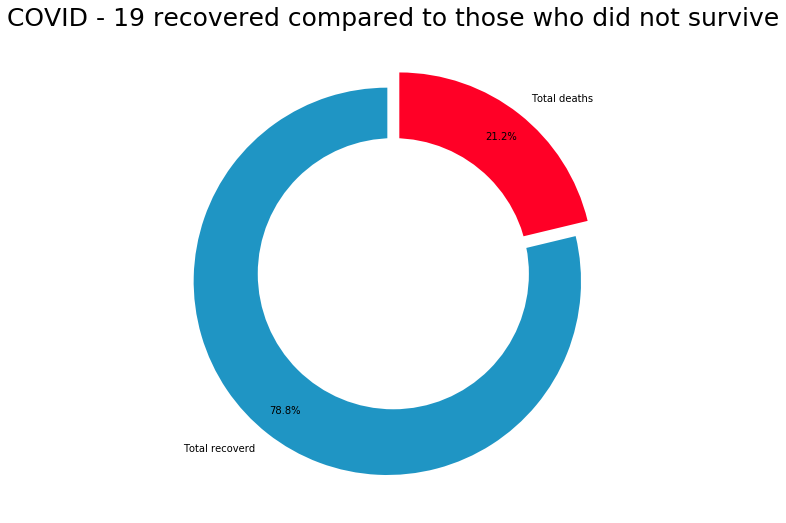

In [111]:
# Pie chart
labels = ['Total recoverd','Total deaths']
sizes = [corona_df['TotalRecovered'].sum(),corona_df['TotalDeaths'].sum()]
sizes_total_were_sick=[corona_df['TotalRecovered'].sum()+corona_df['TotalDeaths'].sum()]
colors = ['#1f95c4','#ff0026']
#explsion
explode = (0.05,0.05)
plt.figure(figsize=(10,15))
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
plt.title("COVID - 19 recovered compared to those who did not survive",fontsize = 25)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()




# Plot
#plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True)
#plt.pie(sizes_gender,colors=colors_gender,radius=0.75,startangle=90)


# Prediction
<img src="./picture/l-237109.jpg" Width="600"/>


### For prediction -we will use first dataframe with Time series of all covid-19 spread per day untill today

In [112]:
#Our dataset with active case time series per each country
df_confirmed


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
0,NaN,Afghanistan,33.00000,65.000000,0,0,0,0,0,0,...,120,170,174,237,273,281,299,349,367,423
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,212,223,243,259,277,304,333,361,377,383
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,511,584,716,847,986,1171,1251,1320,1423,1468
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,334,370,376,390,428,439,466,501,525,545
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,7,7,7,8,8,8,10,14,16,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Falkland Islands (Malvinas),United Kingdom,-51.79630,-59.523600,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,2,2
259,Saint Pierre and Miquelon,France,46.88520,-56.315900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
260,NaN,South Sudan,6.87700,31.307000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,2
261,NaN,Western Sahara,24.21550,-12.885800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,4,4


In [113]:
#Israel confirmed cases time series
israel=df_confirmed[df_confirmed['Country/Region'] == 'Israel']
israel_confirmed=israel.loc[:, new_cols[4]:new_cols[-1]]
israel_confirmed 


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
136,0,0,0,0,0,0,0,0,0,0,...,4247,4695,5358,6092,6857,7428,7851,8430,8904,9248


### prepare list of active cases per day(Worldwide/Israel)

In [114]:
world_cases = [] # sum of all active cases numbers (each day per global)
israel_cases= [] # sum of all active cases numbers (each day per country=Israel)

#create list of all active cases worldwide and for Israel
for i in dates:
    confirmed_sum = confirmed[i].sum() #sum of each column per day
    world_cases.append(confirmed_sum) # list of all cases per day
    il_sum=israel_confirmed[i].sum()
    israel_cases.append(il_sum)# list of all cases in Israel per day

    



### preparing for the model

In [115]:
days_in_future = 10 #days of predicition
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1) #list 0-85
adjusted_dates = future_forcast[:-10] #list 0-85

In [116]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1) ##list 0-75


Time objects prepare

In [117]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y') #convert to datetime-object
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y')) #future_forcast_dates = list of datetime objects + prediction days

### Splitting data to train and test for the model

In [118]:
#days_since_1_22 = list [0-75]  - X for the model
#world cases= list of cases per day - Y for the model

X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.10, shuffle=False)  

In [119]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=4)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

### Polynomail regression model for prediction time series

In [129]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
mse=mean_squared_error(test_linear_pred, y_test_confirmed)
rmse=sqrt(mse)
r2 = r2_score(y_test_confirmed,test_linear_pred)

print(r2)
print(rmse)


MAE: 564.2697595716963
0.6745327018019283
727.2598560227746


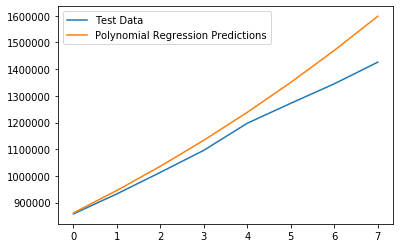

In [121]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

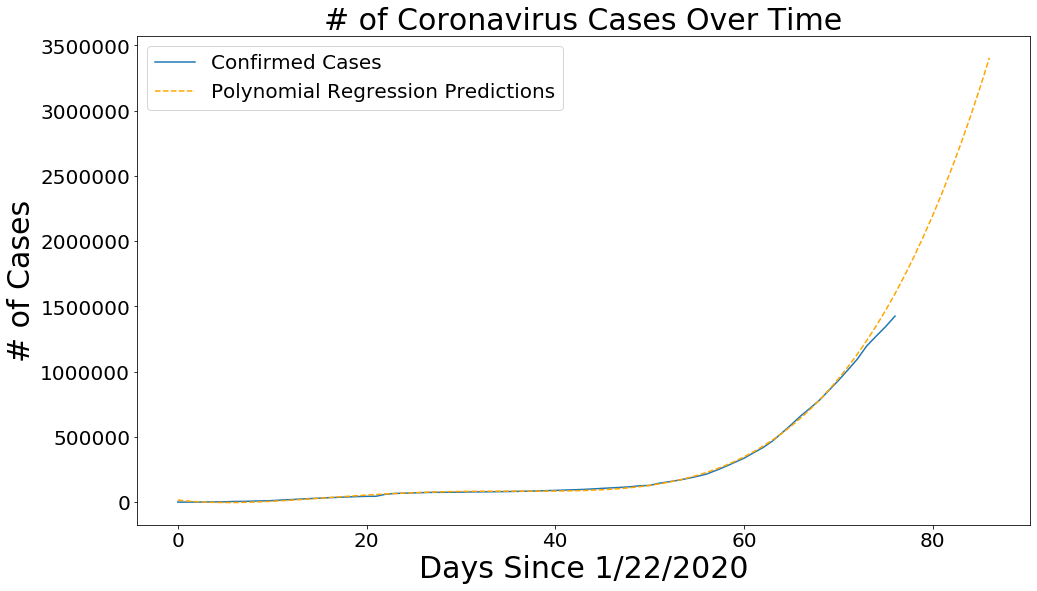

In [122]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast, linear_pred, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'Polynomial Regression Predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [123]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, israel_cases, test_size=0.10, shuffle=False) 

In [124]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=4)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

In [125]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))
r2 = r2_score(test_linear_pred,y_test_confirmed)
print(r2)

MAE: 564.2697595716963
MSE: 528906.8981822669
0.8533313678200765


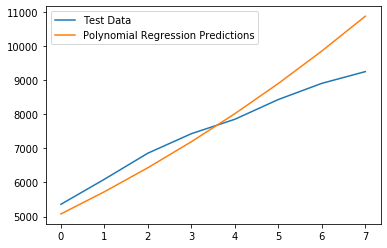

In [126]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

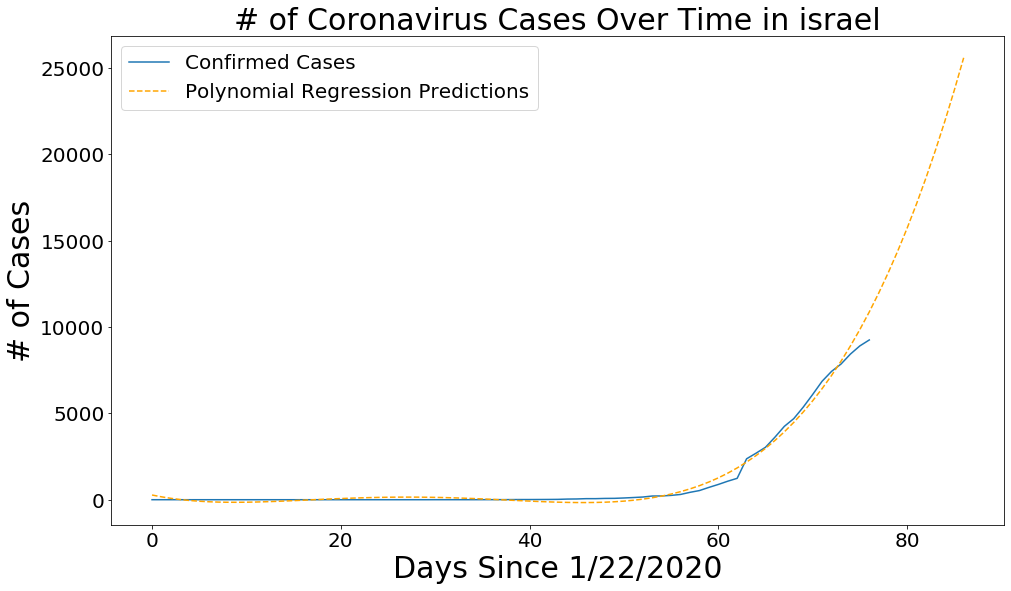

In [127]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, israel_cases)
plt.plot(future_forcast, linear_pred, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Cases Over Time in israel', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'Polynomial Regression Predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

# Conclusions:

#### We can see that the worldwide growth is exponential and our goal is to flat the epidemic curve as flat as possible. Our predictions predicts that the curve will keep grow and if will not start use any safety rules it will keep grow. The curve of illnes in China has been decreased, which means we all need to study from China to use Maximum safety safety rules, we can all help with this by washing our hands regularly, avoiding touching our mouth, nose, and eyes, and staying away from other people when we are sick. This also means calling ahead if you feel sick and want to go to the doctor or hospital.In this time of great distress, it is very important to do what we can to help the human community to fight this virus. Thanks to this project we have found that we need to do maximum efforts to flat the curve
<img src="./picture/curve.jpg" Width="600"/>

<img src="./picture/stop.jpg" Width="600"/>

# 1.Wash your Hands
# 2.Stay at home
# 3.Dont shake Hands
# 4.Keep out of people
# 5.Dont cough into your hands
# 6.Use Masks and gloves
